# Sign Language Detection V4 [Word and Sentence Detection]

## Data and Preprocessing 

In [1]:
# importing dependencies

import numpy as np  # linear algebra
import pandas as pd  # dataset handling
import matplotlib.pyplot as plt # plotting
import seaborn as sns
import tensorflow as tf # tensorflow
import cv2 # computer vision
import os # interacting with the operating system

from tensorflow.keras import Sequential # squential neural network
from tensorflow.keras.layers import Conv2D  # convolutional layer
from tensorflow.keras.layers import MaxPool2D  # pooling layer
from tensorflow.keras.layers import Dense # feed forward layer
from tensorflow.keras.layers import Flatten # flatten 2d/3d array into 1d array
from tensorflow.keras.layers import Dropout # avoid overfitting
from tensorflow.keras.callbacks import EarlyStopping # early stopping to reduce overfitting
from tensorflow.keras.utils import plot_model # plot model architecture
from tensorflow.keras.models import load_model # loading saved model

from sklearn.preprocessing import LabelEncoder # add placeholder values for categorical variables
from sklearn.model_selection import train_test_split # split dataset into training and testing dataset
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report # performance metrics

In [2]:
# extracting files, images and labels 

train_path = r'C:\Users\dariu\Jupyter Notebook\Sign Language Detection\train,test,validation\train'

filename_list = []
image_list = []
label_list = []
labels = ['A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'J', 'K', 'L', 'M', 'N', 'O', 'P', 'Q', 'R', 'S', 'T', 'U', 'V', 'W', 'X', 'Y', 'Z']
for label in labels:
    for filename in os.listdir(train_path+f'\\{label}'):
        file_path = train_path+f'\\{label}'+f'\\{filename}'
        letter = label
        image = cv2.imread(file_path)
        filename_list.append(filename)
        image_list.append(image)
        label_list.append(letter)

In [3]:
# creating meta dataset contiaing filenames, labels, and image

meta_data = pd.DataFrame({'filename':filename_list, 'label':label_list, 'image':image_list})
print(meta_data.shape)
meta_data.head()

(37198, 3)


filename label                                              image
0     0.jpg     A  [[[169, 167, 166], [169, 167, 166], [168, 167,...
1     1.jpg     A  [[[173, 168, 167], [172, 167, 166], [171, 167,...
2    10.jpg     A  [[[170, 168, 167], [169, 167, 166], [165, 166,...
3   100.jpg     A  [[[172, 168, 167], [171, 167, 166], [171, 167,...
4  1001.jpg     A  [[[133, 132, 141], [134, 133, 142], [135, 134,...

In [4]:
# number of of samples per letter (category)

meta_data['label'].value_counts()

M    1435
J    1434
N    1434
D    1432
Q    1431
X    1431
F    1431
H    1430
E    1430
T    1430
C    1430
V    1430
L    1430
I    1430
W    1430
B    1430
K    1430
Z    1430
U    1430
G    1430
P    1430
R    1430
A    1430
O    1430
S    1430
Y    1430
Name: label, dtype: int64

In [5]:
# shuffling meta dataset

meta_data =meta_data.sample(frac=1).reset_index(drop=True)
meta_data.head()

filename label                                              image
0  1334.jpg     U  [[[131, 134, 138], [130, 133, 137], [131, 135,...
1   966.jpg     M  [[[144, 147, 138], [149, 152, 143], [152, 156,...
2   441.jpg     I  [[[147, 144, 139], [146, 143, 138], [145, 142,...
3  1248.jpg     S  [[[126, 132, 137], [126, 132, 137], [126, 132,...
4  1541.jpg     H  [[[113, 125, 127], [111, 123, 125], [111, 123,...

In [6]:
# function that preprocesses the data

def preprocess_image(image):
    """Takes in image array as input and returns resized and scaled image"""
    image = cv2.resize(image, (64,64))
    image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    image = image.reshape(64,64,1)
    image = image.astype('float32')/255.0
    return image

In [7]:
# preprocessing the images

preprocessed_image_list = []
for image in meta_data['image']:
    img = preprocess_image(image)
    preprocessed_image_list.append(img)

In [52]:
meta_data['preprocessed_image'] = preprocessed_image_list
meta_data.head()

filename label                                              image  \
0  1334.jpg     U  [[[131, 134, 138], [130, 133, 137], [131, 135,...   
1   966.jpg     M  [[[144, 147, 138], [149, 152, 143], [152, 156,...   
2   441.jpg     I  [[[147, 144, 139], [146, 143, 138], [145, 142,...   
3  1248.jpg     S  [[[126, 132, 137], [126, 132, 137], [126, 132,...   
4  1541.jpg     H  [[[113, 125, 127], [111, 123, 125], [111, 123,...   

                                  preprocessed_image  
0  [[[0.5176471], [0.5176471], [0.5176471], [0.51...  
1  [[[0.5647059], [0.57254905], [0.5647059], [0.5...  
2  [[[0.5529412], [0.5568628], [0.5686275], [0.56...  
3  [[[0.53333336], [0.5254902], [0.52156866], [0....  
4  [[[0.47843137], [0.47843137], [0.47058824], [0...

## Training Data Set

### Original Image

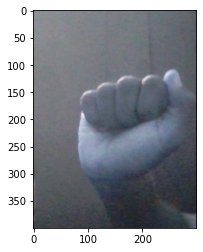

In [29]:
plt.imshow(meta_data[meta_data['label']=='A'].iloc[0,2])

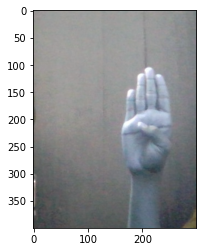

In [28]:
plt.imshow(meta_data[meta_data['label']=='B'].iloc[0,2])

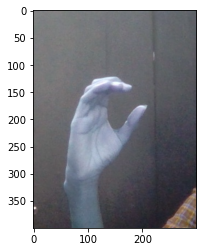

In [30]:
plt.imshow(meta_data[meta_data['label']=='C'].iloc[0,2])

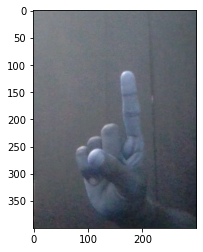

In [31]:
plt.imshow(meta_data[meta_data['label']=='D'].iloc[0,2])

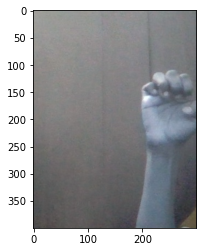

In [32]:
plt.imshow(meta_data[meta_data['label']=='E'].iloc[0,2])

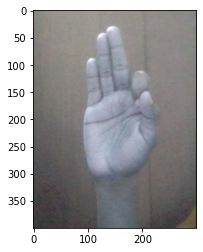

In [33]:
plt.imshow(meta_data[meta_data['label']=='F'].iloc[0,2])

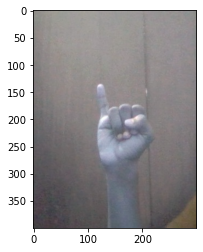

In [34]:
plt.imshow(meta_data[meta_data['label']=='I'].iloc[0,2])

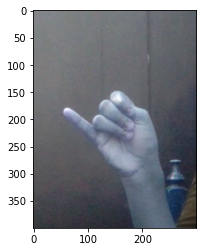

In [35]:
plt.imshow(meta_data[meta_data['label']=='J'].iloc[0,2])

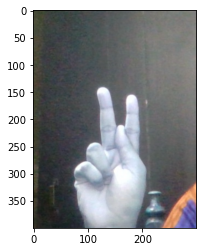

In [36]:
plt.imshow(meta_data[meta_data['label']=='K'].iloc[0,2])

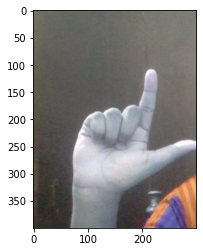

In [37]:
plt.imshow(meta_data[meta_data['label']=='L'].iloc[0,2])

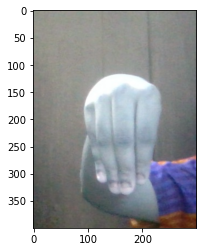

In [38]:
plt.imshow(meta_data[meta_data['label']=='M'].iloc[0,2])

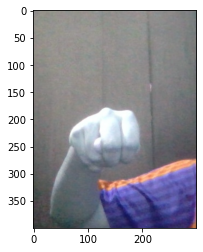

In [39]:
plt.imshow(meta_data[meta_data['label']=='N'].iloc[0,2])

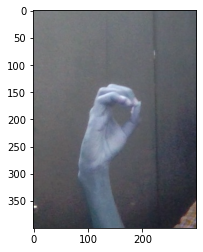

In [40]:
plt.imshow(meta_data[meta_data['label']=='O'].iloc[0,2])

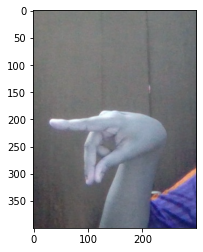

In [41]:
plt.imshow(meta_data[meta_data['label']=='P'].iloc[0,2])

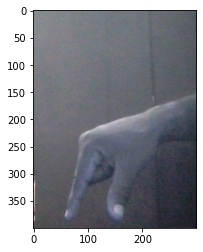

In [42]:
plt.imshow(meta_data[meta_data['label']=='Q'].iloc[0,2])

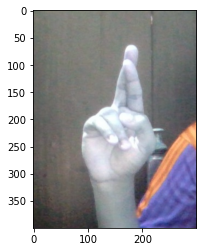

In [43]:
plt.imshow(meta_data[meta_data['label']=='R'].iloc[0,2])

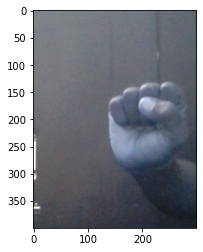

In [44]:
plt.imshow(meta_data[meta_data['label']=='S'].iloc[0,2])

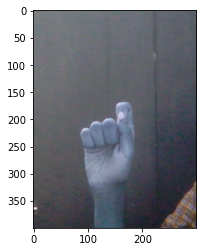

In [45]:
plt.imshow(meta_data[meta_data['label']=='T'].iloc[0,2])

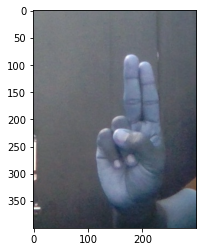

In [46]:
plt.imshow(meta_data[meta_data['label']=='U'].iloc[0,2])

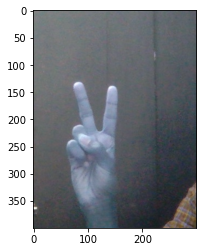

In [47]:
plt.imshow(meta_data[meta_data['label']=='V'].iloc[0,2])

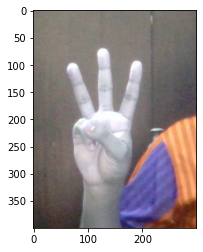

In [48]:
plt.imshow(meta_data[meta_data['label']=='W'].iloc[0,2])

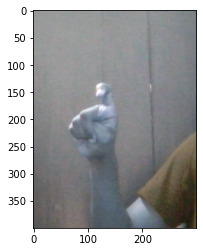

In [49]:
plt.imshow(meta_data[meta_data['label']=='X'].iloc[0,2])

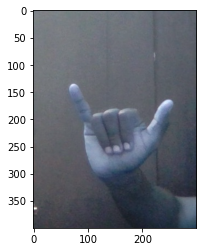

In [50]:
plt.imshow(meta_data[meta_data['label']=='Y'].iloc[0,2])

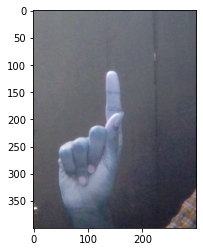

In [51]:
plt.imshow(meta_data[meta_data['label']=='Z'].iloc[0,2])

### Preprocessed Image

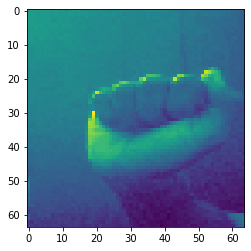

In [56]:
plt.imshow(meta_data[meta_data['label']=='A'].iloc[0,3])

In [ ]:
plt.imshow(meta_data[meta_data['label']=='A'].iloc[0,3])

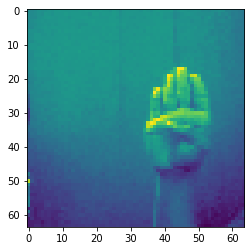

In [57]:
plt.imshow(meta_data[meta_data['label']=='B'].iloc[0,3])

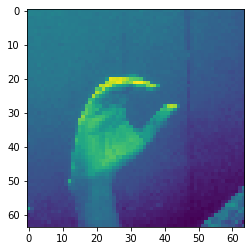

In [58]:
plt.imshow(meta_data[meta_data['label']=='C'].iloc[0,3])

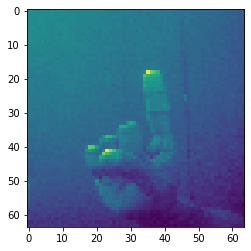

In [59]:
plt.imshow(meta_data[meta_data['label']=='D'].iloc[0,3])

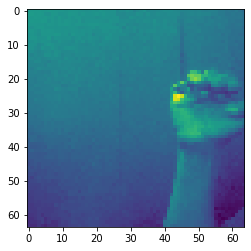

In [60]:
plt.imshow(meta_data[meta_data['label']=='E'].iloc[0,3])

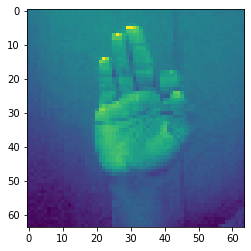

In [61]:
plt.imshow(meta_data[meta_data['label']=='F'].iloc[0,3])

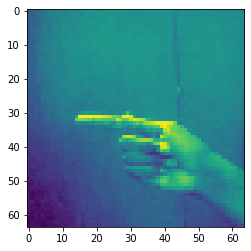

In [62]:
plt.imshow(meta_data[meta_data['label']=='G'].iloc[0,3])

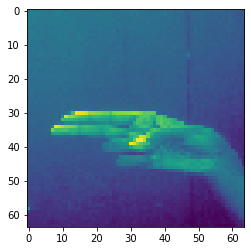

In [63]:
plt.imshow(meta_data[meta_data['label']=='H'].iloc[0,3])

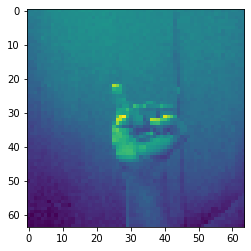

In [64]:
plt.imshow(meta_data[meta_data['label']=='I'].iloc[0,3])

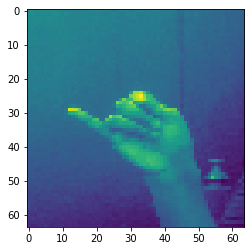

In [65]:
plt.imshow(meta_data[meta_data['label']=='J'].iloc[0,3])

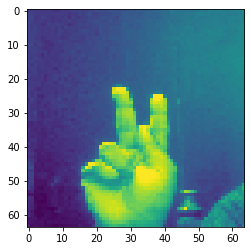

In [66]:
plt.imshow(meta_data[meta_data['label']=='K'].iloc[0,3])

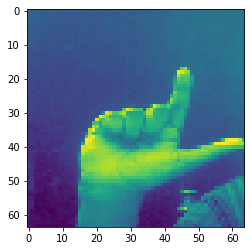

In [67]:
plt.imshow(meta_data[meta_data['label']=='L'].iloc[0,3])

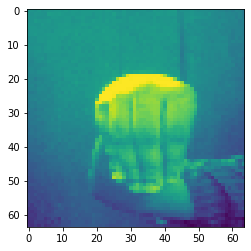

In [68]:
plt.imshow(meta_data[meta_data['label']=='M'].iloc[0,3])

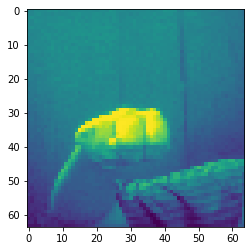

In [69]:
plt.imshow(meta_data[meta_data['label']=='N'].iloc[0,3])

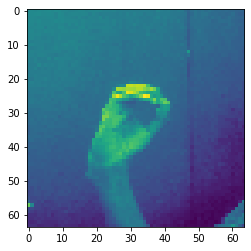

In [70]:
plt.imshow(meta_data[meta_data['label']=='O'].iloc[0,3])

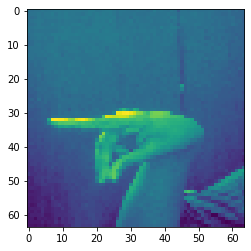

In [71]:
plt.imshow(meta_data[meta_data['label']=='P'].iloc[0,3])

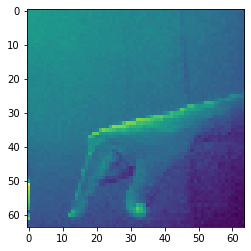

In [72]:
plt.imshow(meta_data[meta_data['label']=='Q'].iloc[0,3])

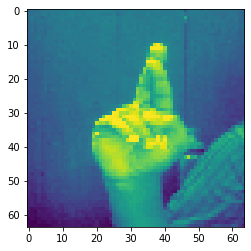

In [73]:
plt.imshow(meta_data[meta_data['label']=='R'].iloc[0,3])

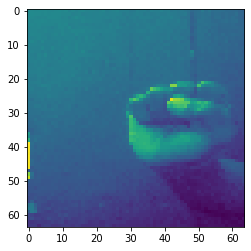

In [74]:
plt.imshow(meta_data[meta_data['label']=='S'].iloc[0,3])

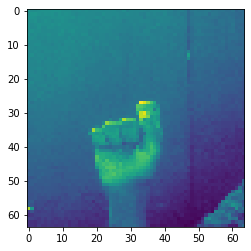

In [75]:
plt.imshow(meta_data[meta_data['label']=='T'].iloc[0,3])

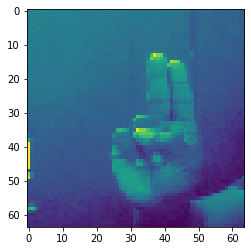

In [76]:
plt.imshow(meta_data[meta_data['label']=='U'].iloc[0,3])

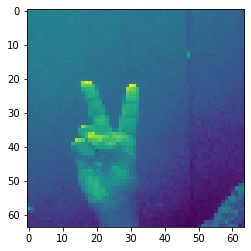

In [77]:
plt.imshow(meta_data[meta_data['label']=='V'].iloc[0,3])

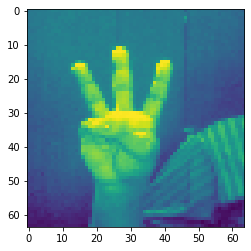

In [78]:
plt.imshow(meta_data[meta_data['label']=='W'].iloc[0,3])

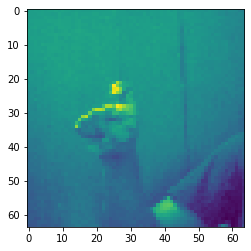

In [79]:
plt.imshow(meta_data[meta_data['label']=='X'].iloc[0,3])

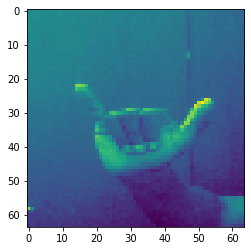

In [80]:
plt.imshow(meta_data[meta_data['label']=='Y'].iloc[0,3])

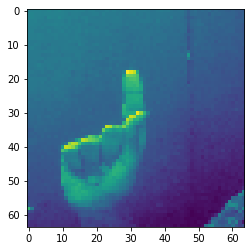

In [81]:
plt.imshow(meta_data[meta_data['label']=='Z'].iloc[0,3])

In [83]:
# splitting meta dataset into inputs and targets

X_train = np.array(preprocessed_image_list)

le = LabelEncoder() 
y_train = meta_data['label'] # adding number placeholders for each category
y_train = le.fit_transform(y_train)

In [84]:
print(X_train.shape, y_train.shape)

(37198, 64, 64, 1) (37198,)


In [85]:
# extracting files, images and labels 

validation_path = r'C:\Users\dariu\Jupyter Notebook\Sign Language Detection\train,test,validation\validation'

filename_list = []
image_list = []
label_list = []
labels = ['A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'J', 'K', 'L', 'M', 'N', 'O', 'P', 'Q', 'R', 'S', 'T', 'U', 'V', 'W', 'X', 'Y', 'Z']
for label in labels:
    for filename in os.listdir(validation_path+f'\\{label}'):
        file_path = validation_path+f'\\{label}'+f'\\{filename}'
        letter = label
        image = cv2.imread(file_path)
        filename_list.append(filename)
        image_list.append(image)
        label_list.append(letter)

In [86]:
# creating meta dataset contiaing filenames, labels, and image

val_meta_data = pd.DataFrame({'filename':filename_list, 'label':label_list, 'image':image_list})
print(val_meta_data.shape)
val_meta_data.head()

(7418, 3)


filename label                                              image
0  1000.jpg     A  [[[134, 135, 139], [133, 134, 138], [132, 133,...
1  1007.jpg     A  [[[135, 134, 144], [134, 133, 143], [132, 134,...
2  1014.jpg     A  [[[132, 137, 138], [130, 135, 136], [129, 134,...
3  1021.jpg     A  [[[131, 134, 139], [131, 134, 139], [131, 134,...
4  1028.jpg     A  [[[134, 139, 140], [137, 142, 143], [133, 138,...

In [87]:
# number of of samples per letter (category)

val_meta_data['label'].value_counts()

M    286
Q    286
D    286
X    286
N    286
F    286
J    286
A    286
G    285
C    285
T    285
H    285
R    285
B    285
V    285
L    285
K    285
Y    285
O    285
I    285
U    285
W    285
S    285
Z    285
E    285
P    285
Name: label, dtype: int64

In [88]:
# shuffling meta dataset

val_meta_data =val_meta_data.sample(frac=1).reset_index(drop=True)
val_meta_data.head()

filename label                                              image
0  1259.jpg     T  [[[124, 128, 133], [123, 127, 132], [123, 126,...
1   230.jpg     O  [[[147, 140, 131], [148, 141, 132], [148, 141,...
2  1924.jpg     E  [[[126, 130, 131], [128, 132, 133], [128, 132,...
3  1749.jpg     E  [[[128, 126, 132], [129, 127, 133], [127, 127,...
4  1833.jpg     I  [[[132, 129, 131], [130, 127, 129], [129, 126,...

In [89]:
preprocessed_image_list = []
for image in val_meta_data['image']:
    img = preprocess_image(image)
    preprocessed_image_list.append(img)

In [90]:
# splitting meta dataset into inputs and targets

X_val = np.array(preprocessed_image_list)

y_val = val_meta_data['label'] # adding number placeholders for each category
y_val = le.transform(y_val)

In [91]:
print(X_val.shape, y_val.shape)

(7418, 64, 64, 1) (7418,)


In [92]:
val_meta_data['preprocessed_image'] = preprocessed_image_list
val_meta_data.head()

filename label                                              image  \
0  1259.jpg     T  [[[124, 128, 133], [123, 127, 132], [123, 126,...   
1   230.jpg     O  [[[147, 140, 131], [148, 141, 132], [148, 141,...   
2  1924.jpg     E  [[[126, 130, 131], [128, 132, 133], [128, 132,...   
3  1749.jpg     E  [[[128, 126, 132], [129, 127, 133], [127, 127,...   
4  1833.jpg     I  [[[132, 129, 131], [130, 127, 129], [129, 126,...   

                                  preprocessed_image  
0  [[[0.50980395], [0.5058824], [0.5058824], [0.4...  
1  [[[0.5568628], [0.54509807], [0.5568628], [0.5...  
2  [[[0.50980395], [0.5058824], [0.49411765], [0....  
3  [[[0.5058824], [0.5058824], [0.5019608], [0.50...  
4  [[[0.5058824], [0.5137255], [0.5019608], [0.50...

## Validation Dataset

### Original Image

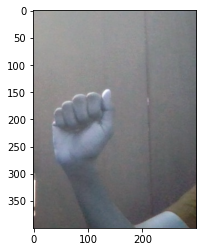

In [93]:
plt.imshow(val_meta_data[val_meta_data['label']=='A'].iloc[0,2])

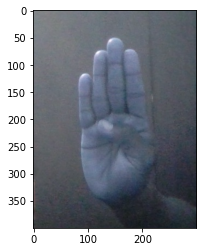

In [94]:
plt.imshow(val_meta_data[val_meta_data['label']=='B'].iloc[0,2])

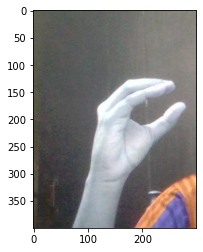

In [95]:
plt.imshow(val_meta_data[val_meta_data['label']=='C'].iloc[0,2])

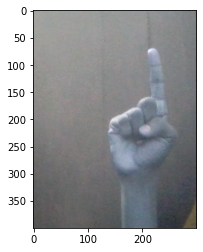

In [96]:
plt.imshow(val_meta_data[val_meta_data['label']=='D'].iloc[0,2])

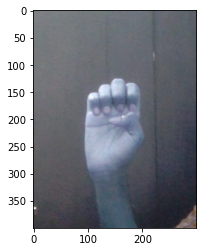

In [97]:
plt.imshow(val_meta_data[val_meta_data['label']=='E'].iloc[0,2])

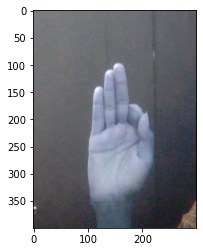

In [98]:
plt.imshow(val_meta_data[val_meta_data['label']=='F'].iloc[0,2])

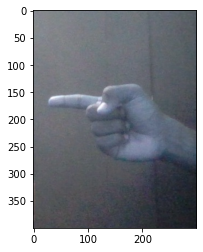

In [99]:
plt.imshow(val_meta_data[val_meta_data['label']=='G'].iloc[0,2])

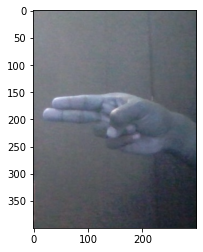

In [100]:
plt.imshow(val_meta_data[val_meta_data['label']=='H'].iloc[0,2])

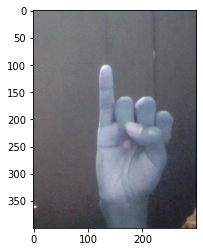

In [101]:
plt.imshow(val_meta_data[val_meta_data['label']=='I'].iloc[0,2])

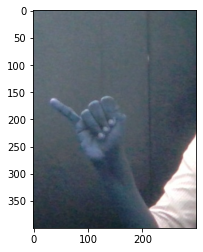

In [102]:
plt.imshow(val_meta_data[val_meta_data['label']=='J'].iloc[0,2])

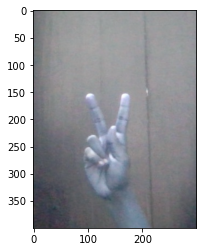

In [103]:
plt.imshow(val_meta_data[val_meta_data['label']=='K'].iloc[0,2])

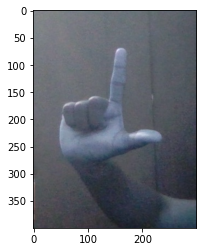

In [104]:
plt.imshow(val_meta_data[val_meta_data['label']=='L'].iloc[0,2])

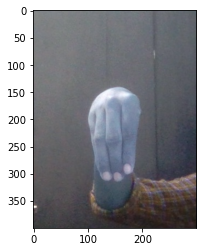

In [105]:
plt.imshow(val_meta_data[val_meta_data['label']=='M'].iloc[0,2])

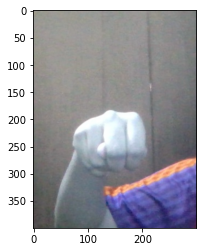

In [106]:
plt.imshow(val_meta_data[val_meta_data['label']=='N'].iloc[0,2])

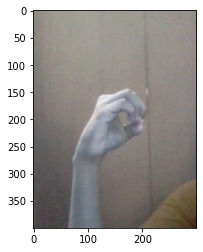

In [107]:
plt.imshow(val_meta_data[val_meta_data['label']=='O'].iloc[0,2])

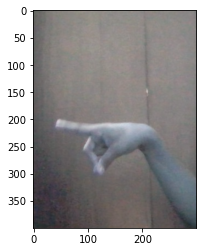

In [108]:
plt.imshow(val_meta_data[val_meta_data['label']=='P'].iloc[0,2])

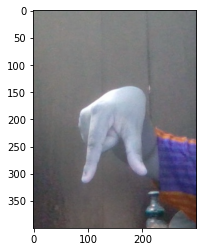

In [109]:
plt.imshow(val_meta_data[val_meta_data['label']=='Q'].iloc[0,2])

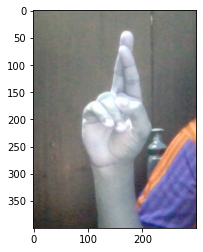

In [110]:
plt.imshow(val_meta_data[val_meta_data['label']=='R'].iloc[0,2])

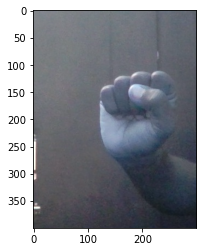

In [111]:
plt.imshow(val_meta_data[val_meta_data['label']=='S'].iloc[0,2])

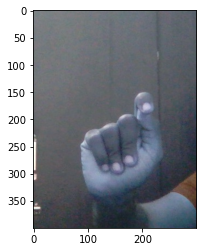

In [112]:
plt.imshow(val_meta_data[val_meta_data['label']=='T'].iloc[0,2])

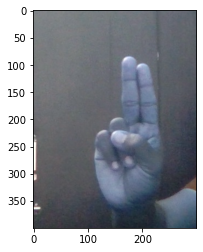

In [113]:
plt.imshow(val_meta_data[val_meta_data['label']=='U'].iloc[0,2])

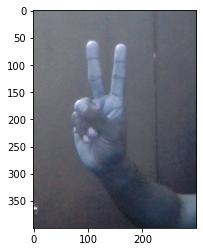

In [114]:
plt.imshow(val_meta_data[val_meta_data['label']=='V'].iloc[0,2])

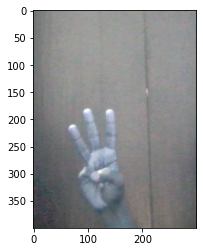

In [115]:
plt.imshow(val_meta_data[val_meta_data['label']=='W'].iloc[0,2])

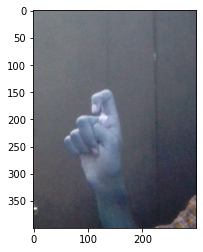

In [116]:
plt.imshow(val_meta_data[val_meta_data['label']=='X'].iloc[0,2])

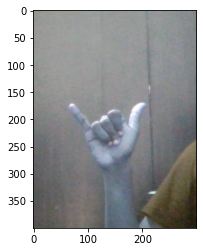

In [117]:
plt.imshow(val_meta_data[val_meta_data['label']=='Y'].iloc[0,2])

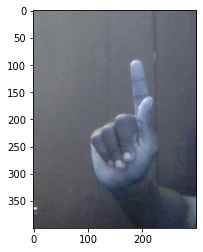

In [118]:
plt.imshow(val_meta_data[val_meta_data['label']=='Z'].iloc[0,2])

### Preprocessed Image

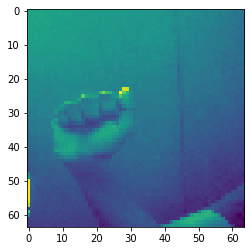

In [120]:
plt.imshow(val_meta_data[val_meta_data['label']=='A'].iloc[0,3])

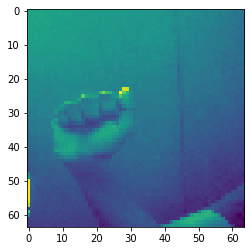

In [121]:
plt.imshow(val_meta_data[val_meta_data['label']=='A'].iloc[0,3])

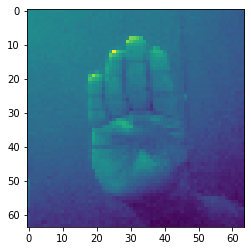

In [123]:
plt.imshow(val_meta_data[val_meta_data['label']=='B'].iloc[0,3])

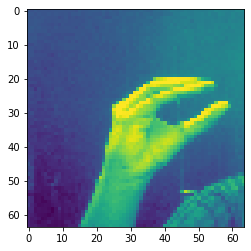

In [124]:
plt.imshow(val_meta_data[val_meta_data['label']=='C'].iloc[0,3])

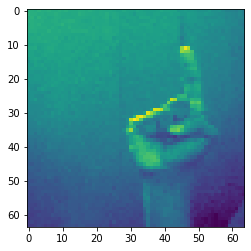

In [127]:
plt.imshow(val_meta_data[val_meta_data['label']=='D'].iloc[0,3])

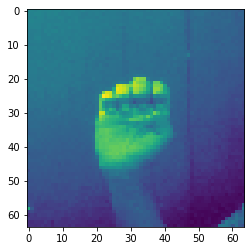

In [128]:
plt.imshow(val_meta_data[val_meta_data['label']=='E'].iloc[0,3])

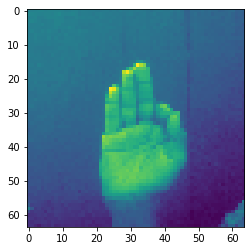

In [129]:
plt.imshow(val_meta_data[val_meta_data['label']=='F'].iloc[0,3])

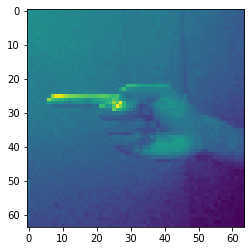

In [130]:
plt.imshow(val_meta_data[val_meta_data['label']=='G'].iloc[0,3])

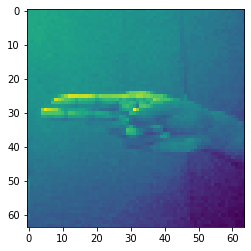

In [131]:
plt.imshow(val_meta_data[val_meta_data['label']=='H'].iloc[0,3])

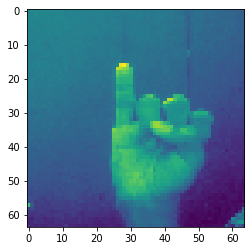

In [132]:
plt.imshow(val_meta_data[val_meta_data['label']=='I'].iloc[0,3])

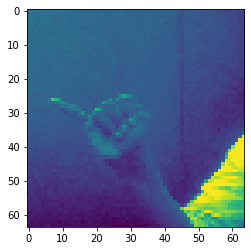

In [133]:
plt.imshow(val_meta_data[val_meta_data['label']=='J'].iloc[0,3])

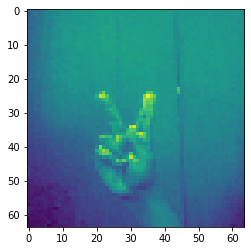

In [134]:
plt.imshow(val_meta_data[val_meta_data['label']=='K'].iloc[0,3])

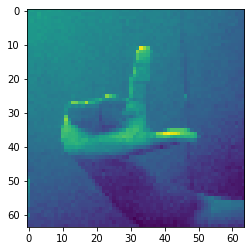

In [135]:
plt.imshow(val_meta_data[val_meta_data['label']=='L'].iloc[0,3])

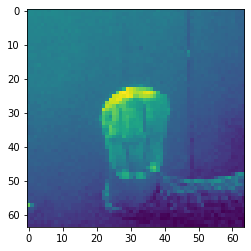

In [136]:
plt.imshow(val_meta_data[val_meta_data['label']=='M'].iloc[0,3])

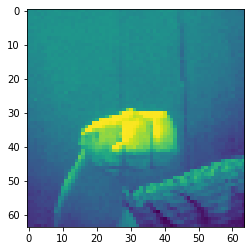

In [137]:
plt.imshow(val_meta_data[val_meta_data['label']=='N'].iloc[0,3])

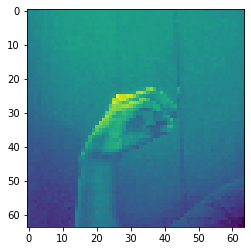

In [138]:
plt.imshow(val_meta_data[val_meta_data['label']=='O'].iloc[0,3])

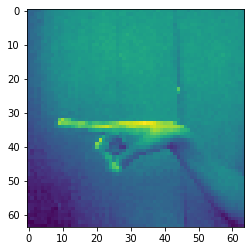

In [139]:
plt.imshow(val_meta_data[val_meta_data['label']=='P'].iloc[0,3])

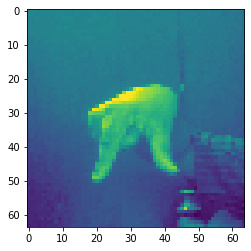

In [141]:
plt.imshow(val_meta_data[val_meta_data['label']=='Q'].iloc[0,3])

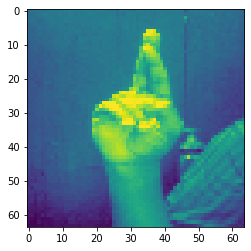

In [142]:
plt.imshow(val_meta_data[val_meta_data['label']=='R'].iloc[0,3])

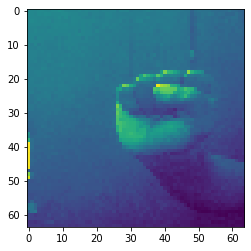

In [143]:
plt.imshow(val_meta_data[val_meta_data['label']=='S'].iloc[0,3])

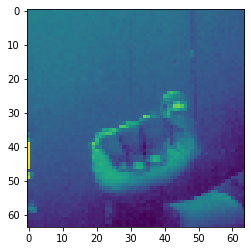

In [144]:
plt.imshow(val_meta_data[val_meta_data['label']=='T'].iloc[0,3])

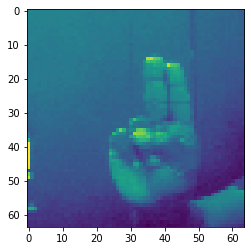

In [145]:
plt.imshow(val_meta_data[val_meta_data['label']=='U'].iloc[0,3])

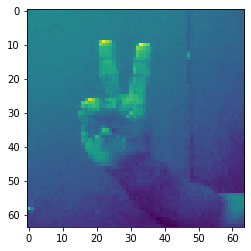

In [146]:
plt.imshow(val_meta_data[val_meta_data['label']=='V'].iloc[0,3])

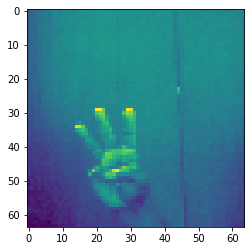

In [147]:
plt.imshow(val_meta_data[val_meta_data['label']=='W'].iloc[0,3])

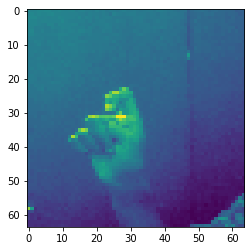

In [148]:
plt.imshow(val_meta_data[val_meta_data['label']=='X'].iloc[0,3])

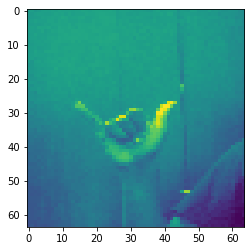

In [149]:
plt.imshow(val_meta_data[val_meta_data['label']=='Y'].iloc[0,3])

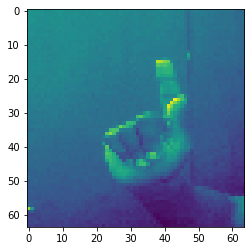

In [150]:
plt.imshow(val_meta_data[val_meta_data['label']=='Z'].iloc[0,3])

## Model Training

In [152]:
# INPUT_SHAPE and OUTPUT_SHAPE hyperparameters

INPUT_SHAPE = X_train.shape[1:]
OUTPUT_SHAPE = len(labels)
print(INPUT_SHAPE, OUTPUT_SHAPE)

(64, 64, 1) 26


In [153]:
# creating CNN model with activation relu
# output layer activation is softmax as this is a multiclassification model

model = Sequential()
model.add(Conv2D(32, (2,2), activation='relu', input_shape=INPUT_SHAPE))
model.add(MaxPool2D(2,2))
model.add(Dropout(0.7))

model.add(Conv2D(64, (2,2), activation='relu'))
model.add(MaxPool2D(2,2))
model.add(Dropout(0.7))

model.add(Conv2D(64, (3,3), activation='relu'))
model.add(MaxPool2D(2,2))
model.add(Flatten())
model.add(Dropout(0.7))
model.add(Dense(70, activation='relu'))
model.add(Dense(OUTPUT_SHAPE, activation='softmax'))

In [154]:
# configuring early stopping to avoid overfitting

es = EarlyStopping(monitor='accuracy', patience=1, restore_best_weights=True)

In [155]:
# using adam as optimizer and sparse_categorical_crossentropy as loss function

model.compile(optimizer='Adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [156]:
# training the model

hist = model.fit(X_train, y_train, epochs=15, batch_size=512, validation_data=(X_val,y_val), verbose=2, callbacks=[es])

Epoch 1/15
73/73 - 13s - loss: 3.2375 - accuracy: 0.0562 - val_loss: 3.2210 - val_accuracy: 0.1730
Epoch 2/15
73/73 - 3s - loss: 2.0630 - accuracy: 0.3880 - val_loss: 0.9789 - val_accuracy: 0.7548
Epoch 3/15
73/73 - 3s - loss: 0.7477 - accuracy: 0.7690 - val_loss: 0.2954 - val_accuracy: 0.9406
Epoch 4/15
73/73 - 3s - loss: 0.3361 - accuracy: 0.8976 - val_loss: 0.1071 - val_accuracy: 0.9811
Epoch 5/15
73/73 - 3s - loss: 0.1946 - accuracy: 0.9405 - val_loss: 0.0584 - val_accuracy: 0.9883
Epoch 6/15
73/73 - 3s - loss: 0.1421 - accuracy: 0.9564 - val_loss: 0.0450 - val_accuracy: 0.9907
Epoch 7/15
73/73 - 3s - loss: 0.1149 - accuracy: 0.9642 - val_loss: 0.0285 - val_accuracy: 0.9935
Epoch 8/15
73/73 - 3s - loss: 0.0879 - accuracy: 0.9724 - val_loss: 0.0268 - val_accuracy: 0.9953
Epoch 9/15
73/73 - 3s - loss: 0.0738 - accuracy: 0.9769 - val_loss: 0.0177 - val_accuracy: 0.9969
Epoch 10/15
73/73 - 3s - loss: 0.0653 - accuracy: 0.9793 - val_loss: 0.0179 - val_accuracy: 0.9966
Epoch 11/15
73/73 

In [157]:
# summary of the model

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 63, 63, 32)        160       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 31, 31, 32)        0         
_________________________________________________________________
dropout (Dropout)            (None, 31, 31, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 30, 30, 64)        8256      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 15, 15, 64)        0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 15, 15, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 13, 13, 64)        3

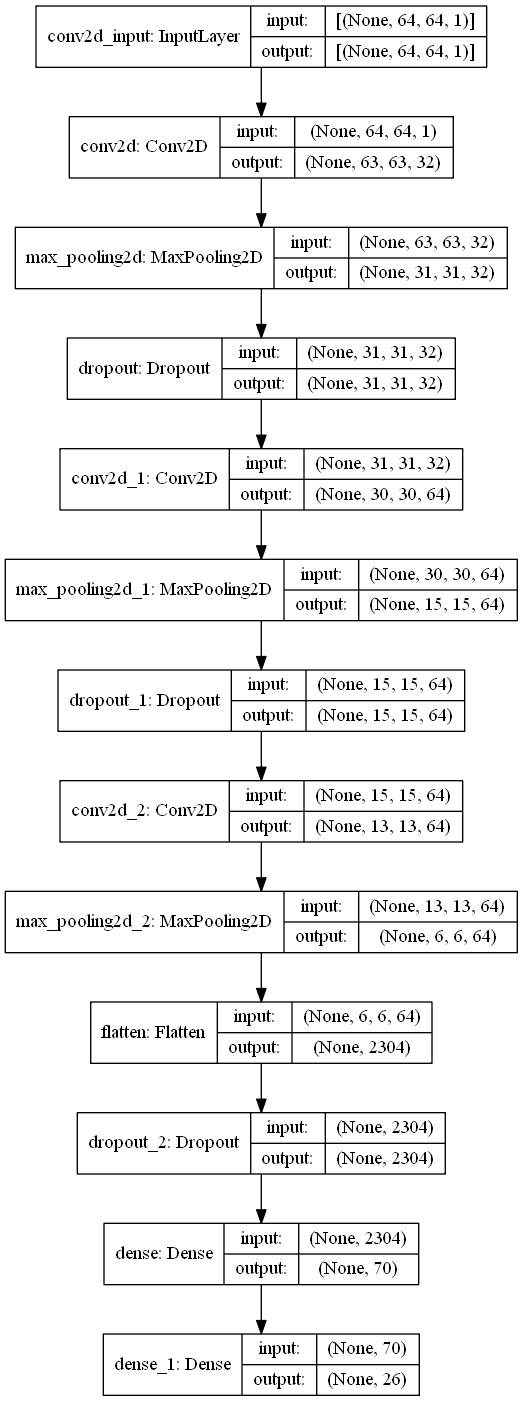

In [158]:
# model architecture

plot_model(model, show_shapes=True)

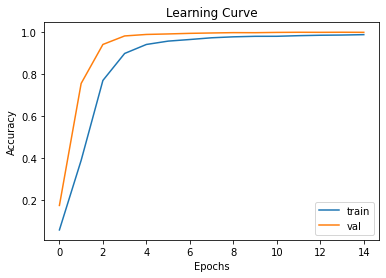

In [159]:
# Accuracy learning curve

plt.title("Learning Curve")
plt.plot(hist.history['accuracy'], label='train')
plt.plot(hist.history['val_accuracy'], label='val')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

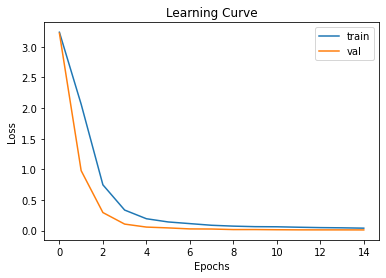

In [160]:
# Loss learning curve

plt.title("Learning Curve")
plt.plot(hist.history['loss'], label='train')
plt.plot(hist.history['val_loss'], label='val')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

## Model Testing

In [161]:
# extracting files, images and labels 

test_path = r'C:\Users\dariu\Jupyter Notebook\Sign Language Detection\train,test,validation\test'

filename_list = []
image_list = []
label_list = []
labels = ['A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'J', 'K', 'L', 'M', 'N', 'O', 'P', 'Q', 'R', 'S', 'T', 'U', 'V', 'W', 'X', 'Y', 'Z']
for label in labels:
    for filename in os.listdir(test_path+f'\\{label}'):
        file_path = test_path+f'\\{label}'+f'\\{filename}'
        letter = label
        image = cv2.imread(file_path)
        filename_list.append(filename)
        image_list.append(image)
        label_list.append(letter)

In [162]:
# creating meta dataset containing filenames, labels, and image

test_meta_data = pd.DataFrame({'filename':filename_list, 'label':label_list, 'image':image_list})
print(test_meta_data.shape)
test_meta_data.head()

(7420, 3)


filename label                                              image
0  1006.jpg     A  [[[132, 136, 141], [132, 136, 141], [133, 136,...
1  1013.jpg     A  [[[132, 137, 138], [130, 135, 136], [129, 134,...
2  1020.jpg     A  [[[138, 140, 141], [137, 139, 140], [136, 138,...
3  1027.jpg     A  [[[132, 136, 137], [132, 136, 137], [130, 135,...
4   103.jpg     A  [[[176, 171, 168], [177, 172, 169], [178, 173,...

In [163]:
# number of of samples per letter (category)

test_meta_data['label'].value_counts()

M    287
Q    286
D    286
X    286
N    286
F    286
J    286
K    286
A    286
G    285
V    285
T    285
H    285
R    285
B    285
L    285
C    285
Y    285
O    285
I    285
U    285
W    285
S    285
Z    285
E    285
P    285
Name: label, dtype: int64

In [164]:
# shuffling meta dataset

test_meta_data =test_meta_data.sample(frac=1).reset_index(drop=True)
test_meta_data.head()

preprocessed_image_list = []
for image in test_meta_data['image']:
    img = preprocess_image(image)
    preprocessed_image_list.append(img)

In [165]:
# splitting meta dataset into inputs and targets

X_test = np.array(preprocessed_image_list)

y_test = test_meta_data['label'] # adding number placeholders for each category
y_test = le.transform(y_test)

In [166]:
print(X_test.shape, y_test.shape)

(7420, 64, 64, 1) (7420,)


In [168]:
test_meta_data['preprocessed_image'] = preprocessed_image_list
test_meta_data.head()

filename label                                              image  \
0  1139.jpg     G  [[[132, 136, 137], [134, 138, 139], [137, 141,...   
1  1153.jpg     R  [[[118, 125, 128], [119, 126, 129], [118, 125,...   
2  1727.jpg     M  [[[128, 128, 134], [127, 127, 133], [128, 128,...   
3   908.jpg     Y  [[[123, 117, 106], [127, 121, 110], [130, 124,...   
4   285.jpg     F  [[[141, 137, 132], [140, 136, 131], [136, 133,...   

                                  preprocessed_image  
0  [[[0.53333336], [0.54901963], [0.5411765], [0....  
1  [[[0.49803922], [0.48235294], [0.49411765], [0...  
2  [[[0.5137255], [0.5254902], [0.52156866], [0.5...  
3  [[[0.46666667], [0.46666667], [0.47843137], [0...  
4  [[[0.5294118], [0.5294118], [0.53333336], [0.5...

## Test Dataset

### Original Data

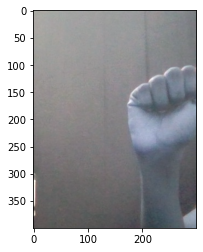

In [169]:
plt.imshow(test_meta_data[test_meta_data['label']=='A'].iloc[0,2])

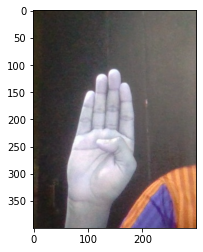

In [170]:
plt.imshow(test_meta_data[test_meta_data['label']=='B'].iloc[0,2])

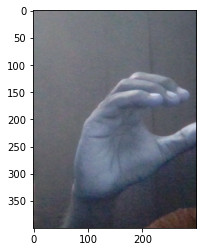

In [171]:
plt.imshow(test_meta_data[test_meta_data['label']=='C'].iloc[0,2])

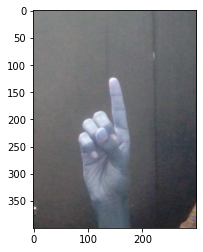

In [172]:
plt.imshow(test_meta_data[test_meta_data['label']=='D'].iloc[0,2])

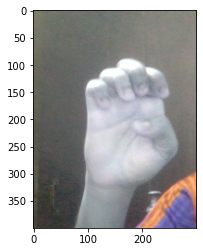

In [173]:
plt.imshow(test_meta_data[test_meta_data['label']=='E'].iloc[0,2])

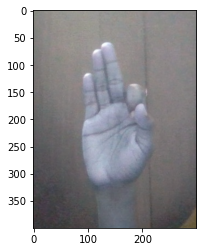

In [174]:
plt.imshow(test_meta_data[test_meta_data['label']=='F'].iloc[0,2])

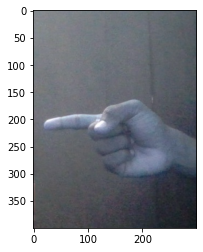

In [175]:
plt.imshow(test_meta_data[test_meta_data['label']=='G'].iloc[0,2])

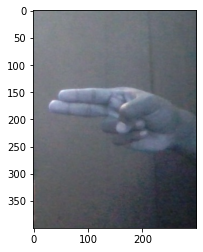

In [176]:
plt.imshow(test_meta_data[test_meta_data['label']=='H'].iloc[0,2])

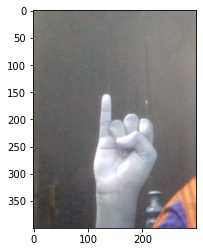

In [177]:
plt.imshow(test_meta_data[test_meta_data['label']=='I'].iloc[0,2])

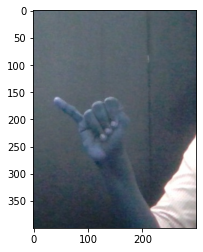

In [178]:
plt.imshow(test_meta_data[test_meta_data['label']=='J'].iloc[0,2])

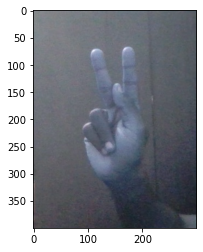

In [179]:
plt.imshow(test_meta_data[test_meta_data['label']=='K'].iloc[0,2])

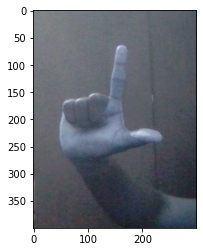

In [180]:
plt.imshow(test_meta_data[test_meta_data['label']=='L'].iloc[0,2])

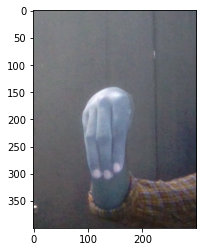

In [181]:
plt.imshow(test_meta_data[test_meta_data['label']=='M'].iloc[0,2])

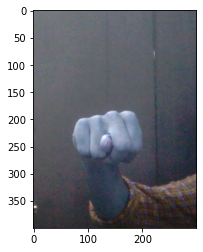

In [182]:
plt.imshow(test_meta_data[test_meta_data['label']=='N'].iloc[0,2])

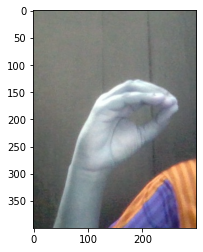

In [183]:
plt.imshow(test_meta_data[test_meta_data['label']=='O'].iloc[0,2])

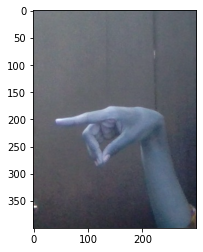

In [184]:
plt.imshow(test_meta_data[test_meta_data['label']=='P'].iloc[0,2])

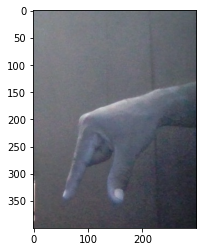

In [185]:
plt.imshow(test_meta_data[test_meta_data['label']=='Q'].iloc[0,2])

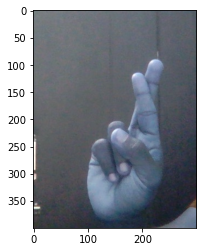

In [186]:
plt.imshow(test_meta_data[test_meta_data['label']=='R'].iloc[0,2])

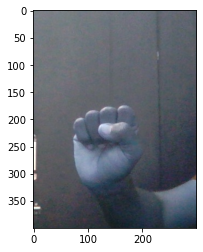

In [187]:
plt.imshow(test_meta_data[test_meta_data['label']=='S'].iloc[0,2])

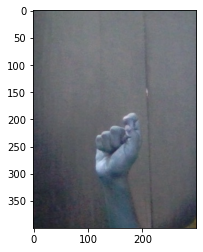

In [188]:
plt.imshow(test_meta_data[test_meta_data['label']=='T'].iloc[0,2])

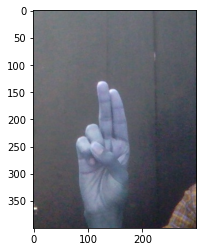

In [189]:
plt.imshow(test_meta_data[test_meta_data['label']=='U'].iloc[0,2])

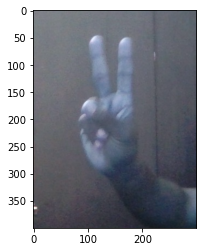

In [190]:
plt.imshow(test_meta_data[test_meta_data['label']=='V'].iloc[0,2])

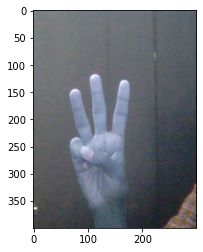

In [191]:
plt.imshow(test_meta_data[test_meta_data['label']=='W'].iloc[0,2])

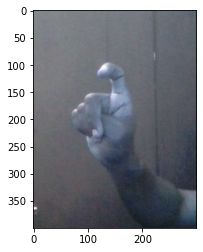

In [192]:
plt.imshow(test_meta_data[test_meta_data['label']=='X'].iloc[0,2])

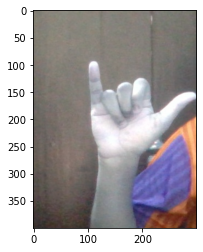

In [193]:
plt.imshow(test_meta_data[test_meta_data['label']=='Y'].iloc[0,2])

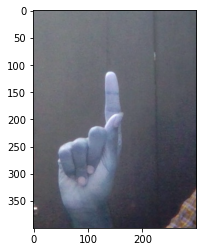

In [194]:
plt.imshow(test_meta_data[test_meta_data['label']=='Z'].iloc[0,2])

### Preprocessed Image

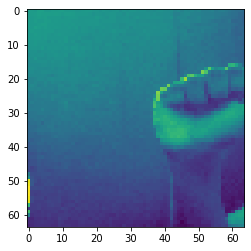

In [197]:
plt.imshow(test_meta_data[test_meta_data['label']=='A'].iloc[0,3])

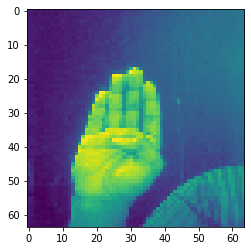

In [199]:
plt.imshow(test_meta_data[test_meta_data['label']=='B'].iloc[0,3])

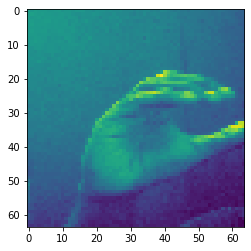

In [200]:
plt.imshow(test_meta_data[test_meta_data['label']=='C'].iloc[0,3])

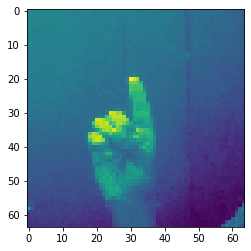

In [201]:
plt.imshow(test_meta_data[test_meta_data['label']=='D'].iloc[0,3])

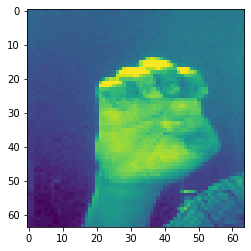

In [202]:
plt.imshow(test_meta_data[test_meta_data['label']=='E'].iloc[0,3])

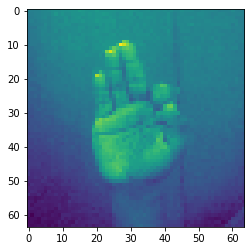

In [203]:
plt.imshow(test_meta_data[test_meta_data['label']=='F'].iloc[0,3])

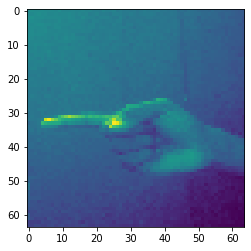

In [204]:
plt.imshow(test_meta_data[test_meta_data['label']=='G'].iloc[0,3])

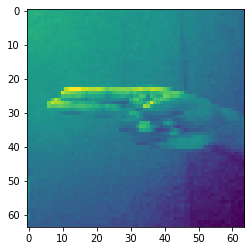

In [205]:
plt.imshow(test_meta_data[test_meta_data['label']=='H'].iloc[0,3])

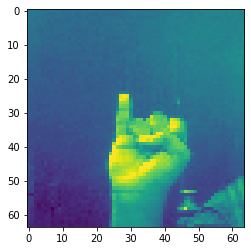

In [206]:
plt.imshow(test_meta_data[test_meta_data['label']=='I'].iloc[0,3])

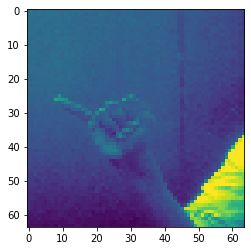

In [207]:
plt.imshow(test_meta_data[test_meta_data['label']=='J'].iloc[0,3])

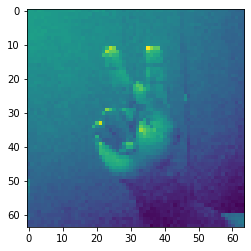

In [208]:
plt.imshow(test_meta_data[test_meta_data['label']=='K'].iloc[0,3])

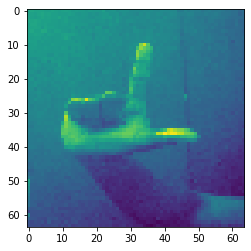

In [209]:
plt.imshow(test_meta_data[test_meta_data['label']=='L'].iloc[0,3])

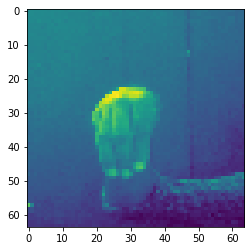

In [210]:
plt.imshow(test_meta_data[test_meta_data['label']=='M'].iloc[0,3])

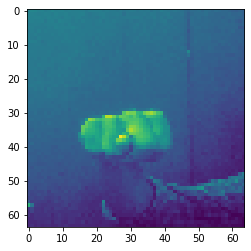

In [211]:
plt.imshow(test_meta_data[test_meta_data['label']=='N'].iloc[0,3])

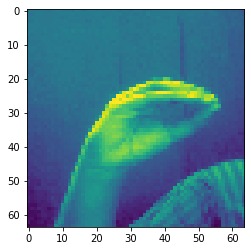

In [212]:
plt.imshow(test_meta_data[test_meta_data['label']=='O'].iloc[0,3])

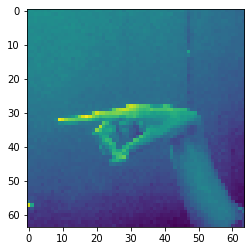

In [213]:
plt.imshow(test_meta_data[test_meta_data['label']=='P'].iloc[0,3])

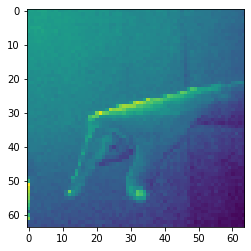

In [214]:
plt.imshow(test_meta_data[test_meta_data['label']=='Q'].iloc[0,3])

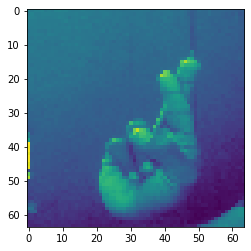

In [215]:
plt.imshow(test_meta_data[test_meta_data['label']=='R'].iloc[0,3])

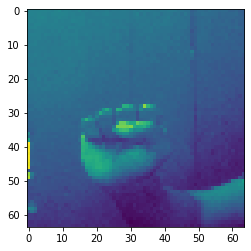

In [216]:
plt.imshow(test_meta_data[test_meta_data['label']=='S'].iloc[0,3])

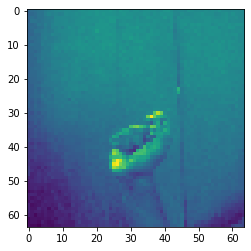

In [217]:
plt.imshow(test_meta_data[test_meta_data['label']=='T'].iloc[0,3])

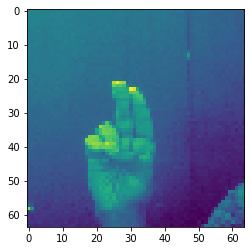

In [218]:
plt.imshow(test_meta_data[test_meta_data['label']=='U'].iloc[0,3])

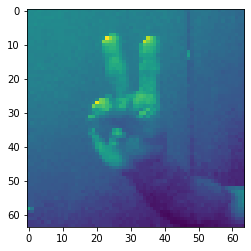

In [219]:
plt.imshow(test_meta_data[test_meta_data['label']=='V'].iloc[0,3])

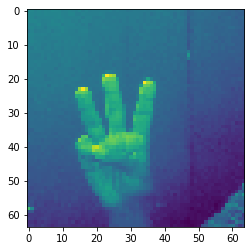

In [220]:
plt.imshow(test_meta_data[test_meta_data['label']=='W'].iloc[0,3])

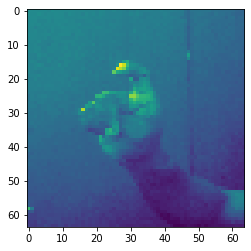

In [221]:
plt.imshow(test_meta_data[test_meta_data['label']=='X'].iloc[0,3])

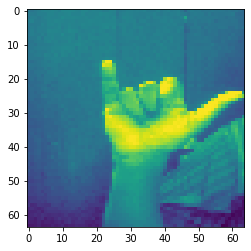

In [222]:
plt.imshow(test_meta_data[test_meta_data['label']=='Y'].iloc[0,3])

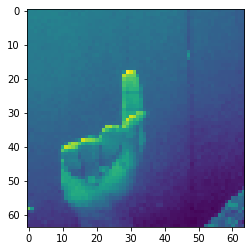

In [223]:
plt.imshow(test_meta_data[test_meta_data['label']=='Z'].iloc[0,3])

In [224]:
# evaluating the model

loss, accuracy = model.evaluate(X_test, y_test, verbose=2)

232/232 - 1s - loss: 0.0069 - accuracy: 0.9980


## Model Performance Metrics

In [225]:
y_pred_prob = model.predict(X_test) # returns an array containing probability for each category being output
y_pred = []
for i in y_pred_prob:
    out = np.argmax(i) # taking the highest probability category as output
    y_pred.append(out)
y_pred = np.array(y_pred)

In [226]:
# accuracy of the model

print(f'Accuracy :{round(accuracy_score(y_test, y_pred),4)*100}%')

Accuracy :99.8%


In [227]:
# classification report

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       286
           1       1.00      1.00      1.00       285
           2       1.00      1.00      1.00       285
           3       1.00      0.99      1.00       286
           4       0.99      1.00      1.00       285
           5       1.00      1.00      1.00       286
           6       1.00      0.99      1.00       285
           7       0.99      1.00      1.00       285
           8       1.00      1.00      1.00       285
           9       1.00      1.00      1.00       286
          10       1.00      1.00      1.00       286
          11       1.00      1.00      1.00       285
          12       1.00      1.00      1.00       287
          13       1.00      1.00      1.00       286
          14       1.00      1.00      1.00       285
          15       1.00      1.00      1.00       285
          16       1.00      1.00      1.00       286
          17       1.00    

<ipython-input-228-4b51091179d5>:7: MatplotlibDeprecationWarning: Case-insensitive properties were deprecated in 3.3 and support will be removed two minor releases later
  plt.title('Confusion Matrix', Fontsize=40)


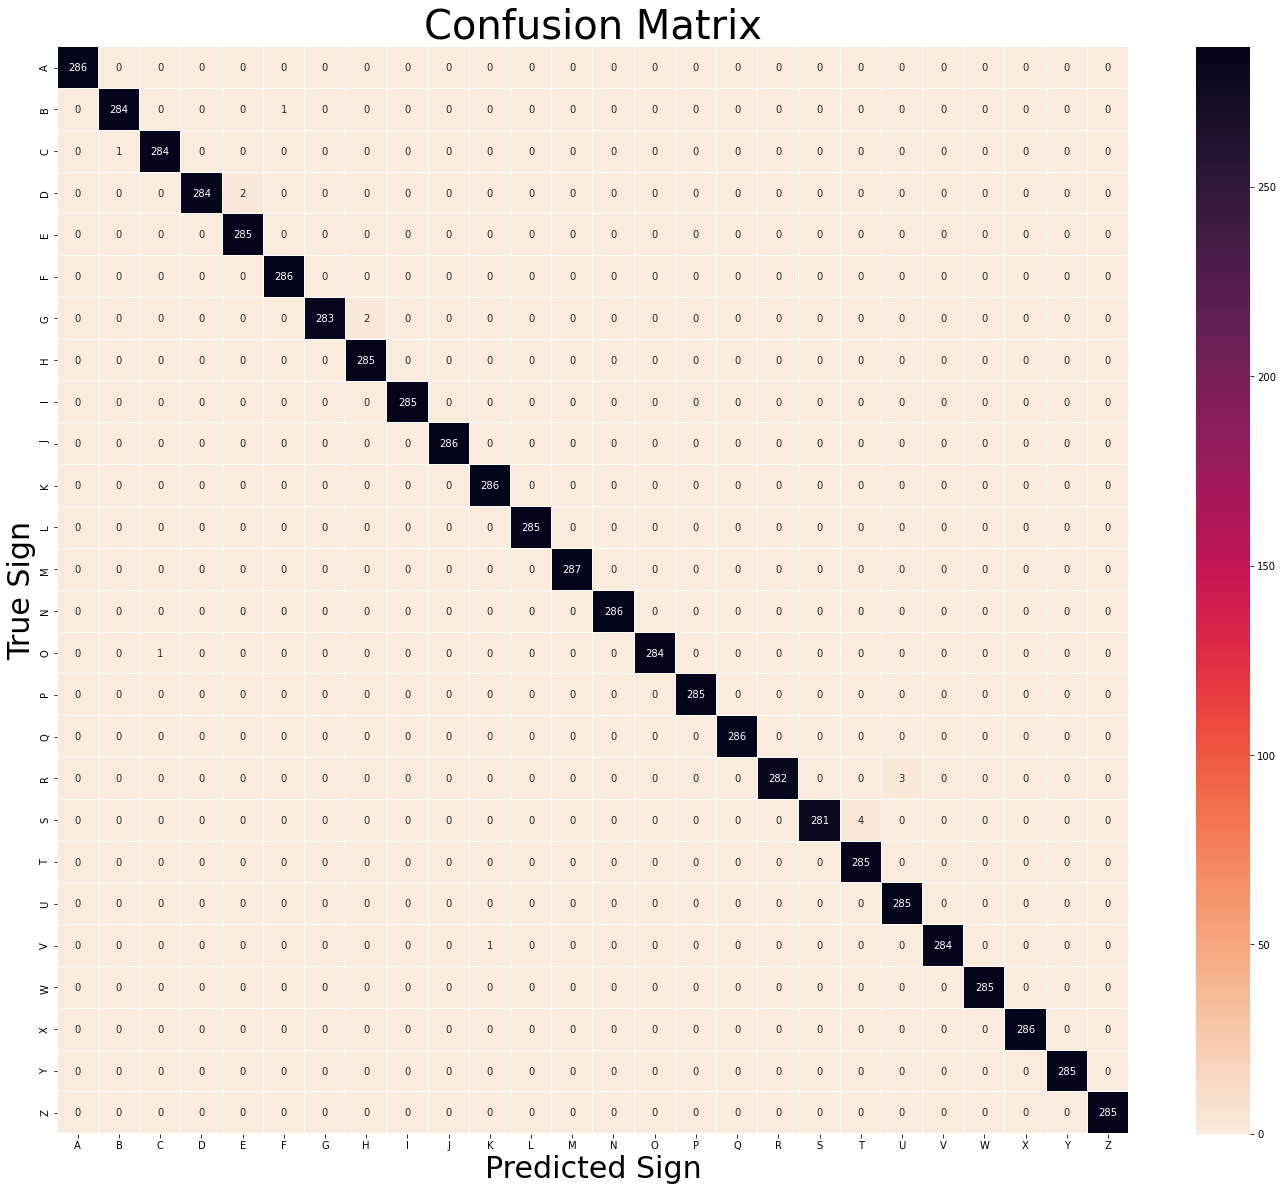

In [228]:
# confusion matrix

cm = confusion_matrix(y_test, y_pred)

# heatmap of confusion matrix
plt.figure(figsize=(24,20))
plt.title('Confusion Matrix', Fontsize=40)
sns.heatmap(cm, xticklabels=labels, yticklabels=labels, cmap='rocket_r', linecolor='white', linewidth=0.005, annot=True, fmt='d')
plt.xlabel('Predicted Sign', fontsize=30)
plt.ylabel('True Sign', fontsize=30)
plt.show()

## Saving the model for future use

In [229]:
# saving the model

model.save('sign_lang_detect_model.h5')

## Loading the model and predicting using the model

In [230]:
# loading the model 

model = load_model('sign_lang_detect_model.h5')

In [231]:
# function that classifies image to detect sign

def classify(image):
    """
    takes image array as input and returns class of the output
    note: returns '' for 'nothing' and 'space' labels
    """
    image = preprocess_image(image)
    image = image.reshape(1,64,64,1)
    pred = model.predict([image])
    idx = np.argmax(pred)
    if idx == 26 or idx==27:
        return ""
    elif idx == 28:
        return " "
    else:
        return labels[idx]

In [232]:
# labels

labels = ['A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'J', 'K', 'L', 'M', 'N', 'O', 'P', 'Q', 'R', 'S', 'T', 'U', 'V', 'W', 'X', 'Y', 'Z', 'del', 'nothing', 'space']

## Real time word detection

In [120]:
# sign language detection on live video

cap = cv2.VideoCapture(0) # 1 for second webcam, use 0 if you have only one webcame

i = 0
last_frame_alpha = None
sentence_list = []
sentence = ''

while True:
    ret, frame = cap.read()
    
    if ret==False:
        cap.release()
        break
    else:
        frame = cv2.flip(frame, 1)
        top, right, bottom, left = 75, 350, 300, 590
        roi = frame[top:bottom, right:left]  # region of intrest
        roi=cv2.flip(roi,1)

        alpha=classify(roi)  # classifying frame
        cv2.rectangle(frame, (left, top), (right, bottom), (0,255,255), 2) # creating classification box
        font=cv2.FONT_HERSHEY_SIMPLEX 
        cv2.putText(frame,alpha,(0,130),font,5,(0,0,255),2) # adding text output 
        cv2.imshow('img',frame)


        if last_frame_alpha==alpha:
            i+=1
        else:
            i=0

        if i>50 and alpha!="":
            print(alpha)
            sentence_list.append(alpha)
            sentence = "".join(sentence_list)
            i=0

        last_frame_alpha = alpha

        text_window = np.zeros((512, 512, 1), dtype = "uint8")
        text_window = cv2.resize(text_window, (1400, 220))
        cv2.putText(text_window, sentence,(0,130),font,3,(255,255,255),2)
        cv2.imshow('Text', text_window)

        if cv2.waitKey(1) & 0xFF==ord('q'): # press q to stop capture
            cap.release()
            break

cv2.destroyAllWindows()
print("".join(sentence_list))